Proposal planning with the wd+dm gold sample

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii

import astropy.units as u

import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime

# Access astronomical databases
from pyvo import registry  # version >=1.6

# Moc and HEALPix tools
# from mocpy import MOC


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [30]:
# CATALOGUE = "J/MNRAS/504/2420"
# catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# # the actual query to the registry
# voresource = registry.search(ivoid=catalogue_ivoid)[0]
# tables = voresource.get_tables()
# print(f"In this catalogue, we have {len(tables)} tables.")
# for table_name, table in tables.items():
#     print(f"{table_name}: {table.description}")
#     tables_names = list(tables.keys())
# tables_names
# dms = tables[tables_names[0]]

In [28]:
dms = fits.getdata('tables/J_MNRAS_504_2420_tablea1.dat.fits.gz')

In [29]:
dms.names

['Name',
 'GaiaDR2',
 'Refs',
 'RAdeg',
 'DEdeg',
 'Type',
 'Teffwd',
 'logg',
 'Porb',
 'sp',
 'plx',
 'e_plx',
 'pmRA',
 'pmDE',
 'Gmag',
 'e_Gmag',
 'BPmag',
 'e_BPmag',
 'RPmag',
 'e_RPmag',
 'GLON',
 'GLAT',
 'ruwe',
 'rest',
 'e_rest',
 'GalexCoverage',
 'ObjID',
 'FUVmag',
 'e_FUVmag',
 'NUVmag',
 'e_NUVmag']

(array([89., 11.,  5.,  3.,  2.,  2.,  0.,  0.,  0.,  2.]),
 array([  0.     ,  10.45622,  20.91244,  31.36866,  41.82488,  52.2811 ,
         62.73732,  73.19354,  83.64976,  94.10598, 104.5622 ]),
 <BarContainer object of 10 artists>)

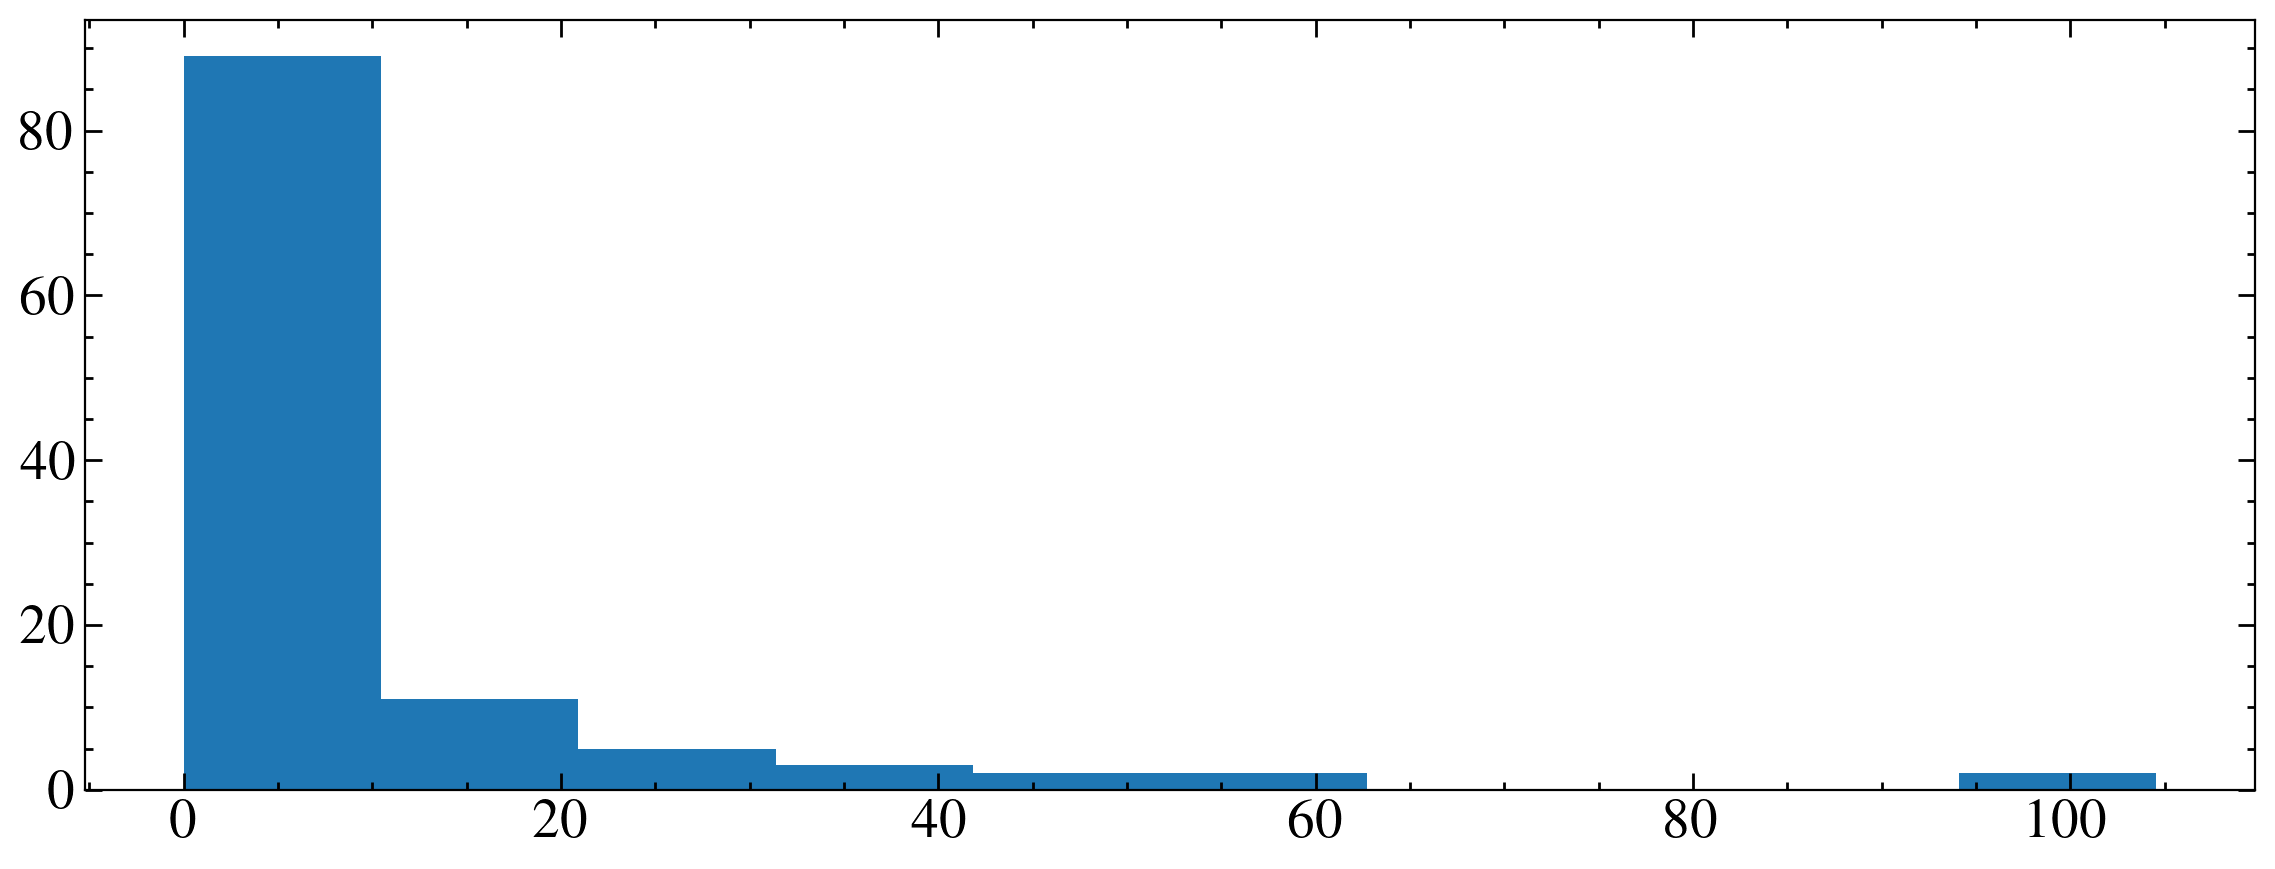

In [34]:
plt.hist(dms['Porb'])

In [38]:
# fits.getheader('tables/J_MNRAS_504_2420_tablea1.dat.fits.gz', 1)

XTENSION= 'TABLE   '           / Ascii Table Extension                          
BITPIX  =                    8 / Character data                                 
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                  561 / Number of bytes per record                     
NAXIS2  =                  114 / Number of records                              
PCOUNT  =                    0 / Get rid of random parameters                   
GCOUNT  =                    1 / Only one group (isn't it obvious?)             
TFIELDS =                   31 / Number of data fields (columns)                
EPOCH   =               2015.5 / Epoch of coordinates                           
EXTNAME = 'tablea1.dat'        / The WD+M Gold Sample                           
TBCOL1  =                    1 / ============== Start column +0                 
TFORM1  = 'A24     '           / Fortran Format                                 
TTYPE1  = 'Name    '        

(array([10.,  9.,  9., 10., 11., 17., 10., 13., 13., 12.]),
 array([ 28.68401817,  55.56528119,  82.44654421, 109.32780723,
        136.20907025, 163.09033327, 189.97159629, 216.85285931,
        243.73412232, 270.61538534, 297.49664836]),
 <BarContainer object of 10 artists>)

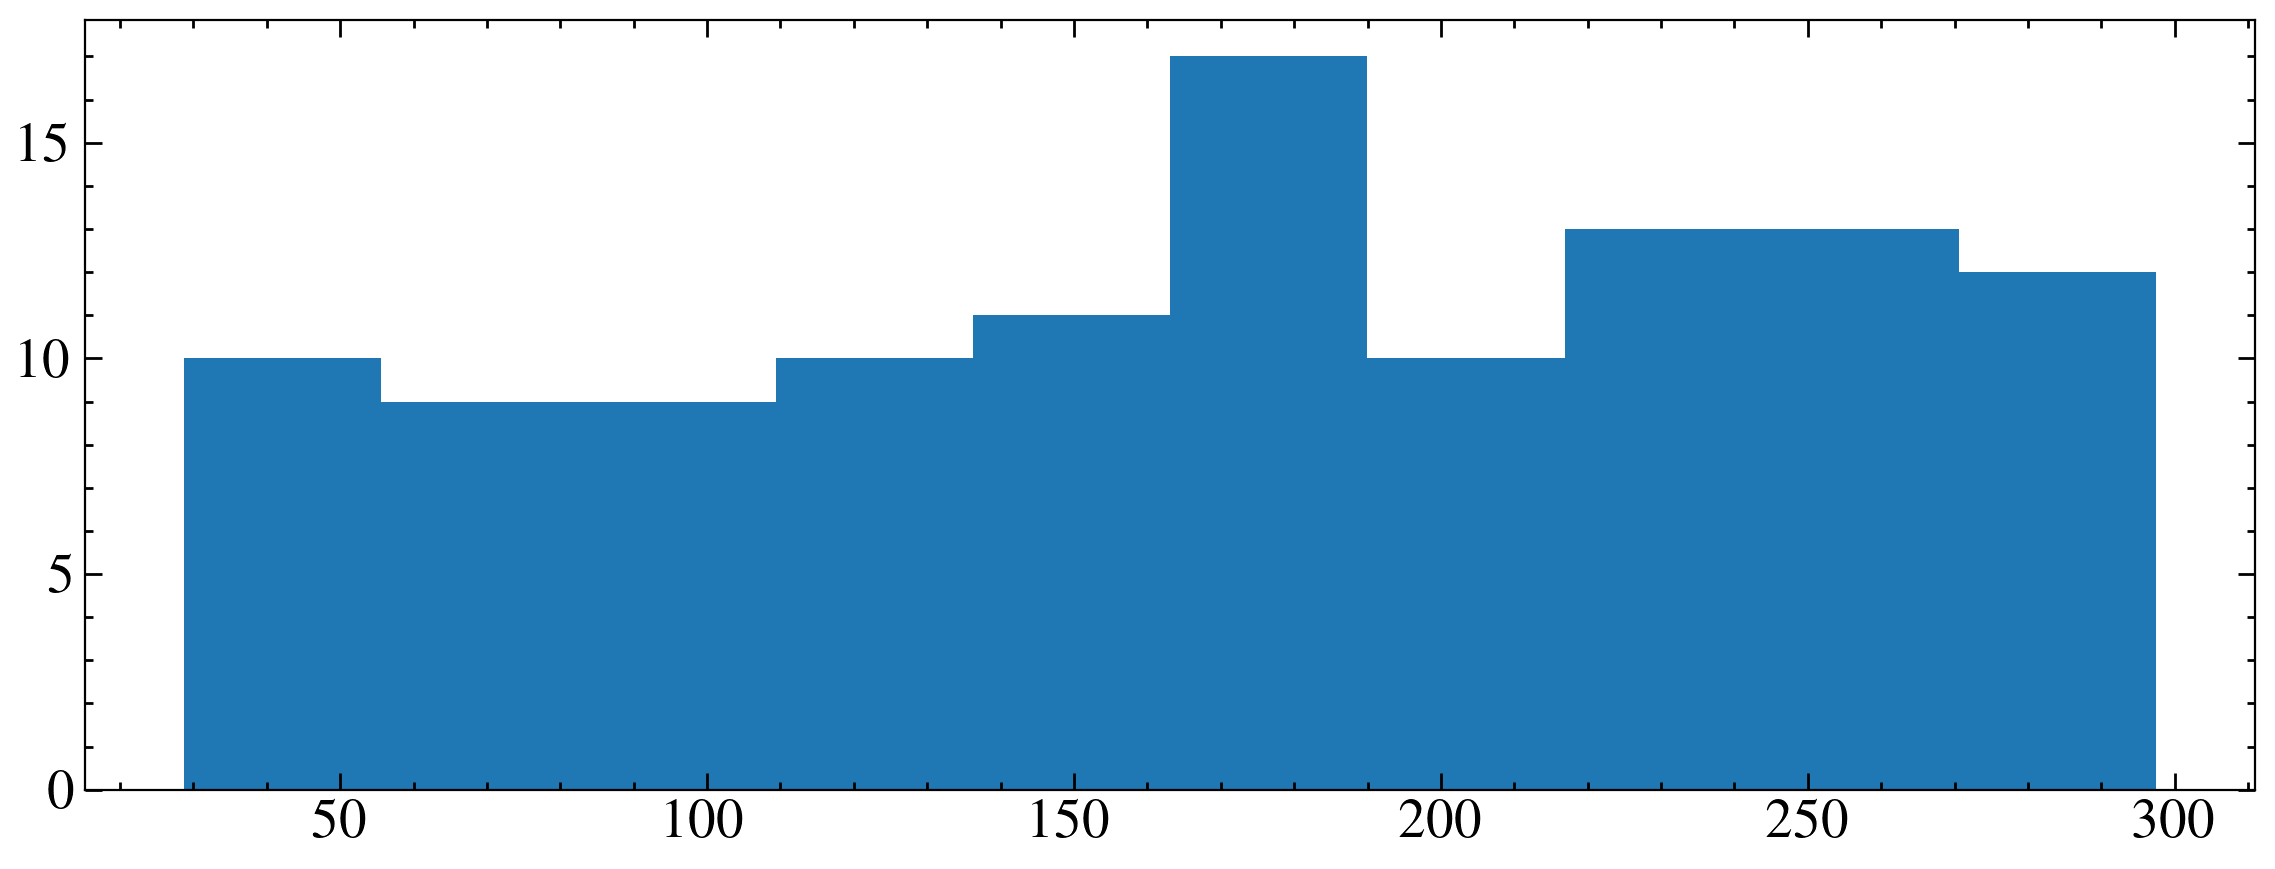

In [39]:
plt.hist(dms['rest'])

Lya candidates: Closer than 50pc then look up favourable RVs, Low Teff WD

In [43]:
dmask = dms['rest'] <50
print(len(dms[dmask]))

9


Well that narrows it down a bit

In [45]:
dms.names

['Name',
 'GaiaDR2',
 'Refs',
 'RAdeg',
 'DEdeg',
 'Type',
 'Teffwd',
 'logg',
 'Porb',
 'sp',
 'plx',
 'e_plx',
 'pmRA',
 'pmDE',
 'Gmag',
 'e_Gmag',
 'BPmag',
 'e_BPmag',
 'RPmag',
 'e_RPmag',
 'GLON',
 'GLAT',
 'ruwe',
 'rest',
 'e_rest',
 'GalexCoverage',
 'ObjID',
 'FUVmag',
 'e_FUVmag',
 'NUVmag',
 'e_NUVmag']

In [60]:
dms50 = dms[dmask]

for row in dms50:
    print(row['Name'],',','WD Gold',',', row['rest'],',', row['Type'],',', row['Teffwd'],',', row['Porb'])#, row['NUVmag'])

# print(dms50['Name'])
# print(dms50['Type'])

SDSS J013851.54-001621.6 , WD Gold , 49.7404959092691 , WD+M , 0 , 1.746529272
SDSS J121010.13+334722.9 , WD Gold , 46.0366205231954 , WD+M , 0 , 2.987754336
WD 0354+463 , WD Gold , 43.4111127265378 , DA , 8230 , 3.964872
WD 0752-146 , WD Gold , 39.2180467889888 , DA , 19440 , 25.25784
WD 1333+487 , WD Gold , 36.8727202327802 , DB , 14676 , 42.14016
LTT 560 , WD Gold , 44.7259863342653 , DA , 7500 , 3.552
V* DE CVn , WD Gold , 30.5224590135549 , DA , 8000 , 8.736
V* EG UMa , WD Gold , 28.6840181684358 , DA , 13100 , 16.032
V* HK Cet , WD Gold , 46.0410704984134 , DA+BD , 0 , 9.984


In [52]:
for name  in dms50['Name']:
    print(name, ',')

SDSS J013851.54-001621.6 ,
SDSS J121010.13+334722.9 ,
WD 0354+463 ,
WD 0752-146 ,
WD 1333+487 ,
LTT 560 ,
V* DE CVn ,
V* EG UMa ,
V* HK Cet ,


In [65]:
for row in dms50:
    print(row['Name'],row['sp'])


SDSS J013851.54-001621.6 5.0
SDSS J121010.13+334722.9 5.0
WD 0354+463 7.0
WD 0752-146 6.0
WD 1333+487 6.5
LTT 560 5.5
V* DE CVn 3.0
V* EG UMa 3.5
V* HK Cet 0.0
